<a href="https://colab.research.google.com/github/hannape/CNN-pierwsze-podejscie/blob/master/load_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Próbujem od początku:**
1. wczytujemy nagrania 1-s z google disca
2. robimy spektro/mel spektrum próbki
3. czy trzeba gdzies te spektrogramy w formie obrazków zapisac czy od razu można ładować wartości do jakiejś struktury/tablicy?




In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install librosa
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
from keras.preprocessing.image import ImageDataGenerator
import glob
import os
import random

In [0]:
 # Tworzenie macierzy treningowej / testowej z wavów na Google dysku, wrzucenie melspektrogramów do jednej tablicy. 

n_mels = 60
sample_rate = 44100

main_file_path =   "drive/My Drive/nagrania_probne/*/"  # główny folder z subfolderami "drive/My Drive/nagrania_probne/Test2016/*/"
nagranie = glob.glob(main_file_path)
print(nagranie)

for j in range (8,9):  # np.size(nagranie)

  print(nagranie[j])
  file_path = nagranie[j]+ "*.wav"                     #"drive/My Drive/nagrania_probne/1swierszcze_nakladki_BUK4_20160925_204604_1s/"
  print(file_path)
  n_files = glob.glob(file_path)    #'drive/My Drive/nagrania_probne/1swierszcze_nakladki_BUK4_20160925_204604_67.wav'
  sizes = [len(k) for k in n_files]
  name_cut = max(sizes)
  print(name_cut)
  
  file_path = sorted(glob.glob(file_path), key=lambda name: int(name[name_cut-8:-4]))    ##'drive/My Drive/nagrania_probne/1swierszcze_nakladki_BUK4_20160925_204604_67.wav'
  print(file_path)

  col, rows = 87, 60;
  n_train = 500 # np.size(file_path) #1799
  matrix = n_train*[rows*[col*[0]]]

  for i in range (0,n_train):
    audio = librosa.core.load(file_path[i], sr=44100)[0]
    matrix[i] = librosa.feature.melspectrogram(y=audio, sr=44100, n_mels= n_mels, fmin = 4000, fmax=9500)
    ##print(np.shape(mel_spec))
    
  print(np.shape(matrix))
  ##plt.imshow(matrix[i], cmap="jet")
  nazwa_nagr = nagranie[j][31:-3]
  np.save(('drive/My Drive/500_train/'+ nazwa_nagr + '_po500' ),matrix)



In [0]:
# TRAIN. stworzenie jednej macierzy z wszystkimi obrazkami treningowymi, + anotacje

file_path_500= "drive/My Drive/500_train/*"   # główny folder z subfolderami "drive/My Drive/nagrania_probne/*/"
fold_train = sorted(glob.glob(file_path_500))
print(fold_train)
X_train = np.load('drive/My Drive/500_train/1swierszcze_nakladki_BUK4_20160925_204604__po500.npy')

file_path_500_label= "drive/My Drive/labele/labele_train/*"   # główny folder z subfolderami "drive/My Drive/nagrania_probne/*/"
fold_label = sorted(glob.glob(file_path_500_label))
print(fold_label)
y_read = pd.read_csv('drive/My Drive/labele/labele_train/1swierszcze_nakladki_BUK4_20160925_204604_1s.csv')
y_train = y_read.hasbird[0:500]

for i in range (1,np.size(fold_train)):  #np.size(fold_train)
  nazwa_nagr = fold_train[i][25:]
  B = np.load('drive/My Drive/500_train/'+ nazwa_nagr)
  X_train = np.concatenate((X_train,B))
  print(nazwa_nagr)
  
  nazwa_label = fold_label [i][35:]
  print(nazwa_label)
  B_df = pd.read_csv('drive/My Drive/labele/labele_train/'+ nazwa_label)
  y_train= np.concatenate((y_train,B_df.hasbird[0:500]))

print(np.shape(X_train))
print(np.size(y_train))

In [0]:
np.save(('drive/My Drive/X_train_po500'), X_train)
np.save(('drive/My Drive/y_train_po500'), y_train)

In [0]:
# TEST. stworzenie jednej macierzy z wszystkimi obrazkami teestowymi, + anotacje

file_path_500= "drive/My Drive/500_test/Test2016/*"   # główny folder z subfolderami "drive/My Drive/nagrania_probne/*/"
fold_train = sorted(glob.glob(file_path_500))
print(fold_train)
X_test = np.load('drive/My Drive/500_test/Test2016/BUK4_20160922_005604__po500.npy')

file_path_500_label= "drive/My Drive/labele/labele_test/*"   # główny folder z subfolderami "drive/My Drive/nagrania_probne/*/"
fold_label = sorted(glob.glob(file_path_500_label))
print(fold_label)
y_read = pd.read_csv('drive/My Drive/labele/labele_test/BUK4_20160922_005604_1s.csv')
y_test = y_read.hasbird[0:500]

for i in range (1,np.size(fold_train)):  #np.size(fold_train)
  nazwa_nagr = fold_train[i][33:]
  B = np.load('drive/My Drive/500_test/Test2016/'+ nazwa_nagr)
  X_test = np.concatenate((X_test,B))
  print(nazwa_nagr)
  
  nazwa_label = fold_label [i][34:]
  print(nazwa_label)
  B_df = pd.read_csv('drive/My Drive/labele/labele_test/'+ nazwa_label)
  y_test= np.concatenate((y_test,B_df.hasbird[0:500]))

print(np.shape(X_test))
print(np.size(y_test))

np.save(('drive/My Drive/X_test_po500'), X_test)
np.save(('drive/My Drive/y_test_po500'), y_test)

500
65


1

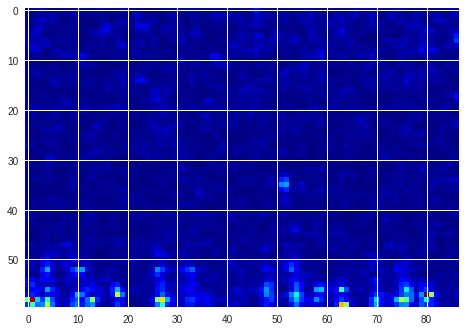

In [0]:
## przykładowy

print(np.size(y_train))
np.shape(X_train)
a = 65 #random.randint(0, 499);
plt.imshow(X_train[a], cmap="jet")
print(a)
y_train[a]